<a href="https://colab.research.google.com/github/joeneb24/Sales-Predictions/blob/main/SalesPredictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sales Predictions

- Joseph Nebres

## Loading Data

In [ ]:
#Imports
import pandas as pd

In [ ]:
#Load in Dataset for Salespredictions
#Preview the first rows of data
#Summarizes DataFrame's Columns
file_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vS9SEjSA2DlHLyUd3DK3JqhGhwo_TOPl3UP7AhyFyy2azZHzaO_2hxbvS39sfpvKqjAZiiWctE9Hh8h/pub?gid=742522966&single=true&output=csv"
df = pd.read_csv(file_url)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Data Cleaning

In [ ]:
#Describe the row and column sizes. 
df.shape

(8523, 12)

In [ ]:
#Describes the datatypes of each variable. 
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
#Checking if any data is duplicated. 
df.duplicated().any()

False

In [ ]:
#Checking the count of the total data that is duplicated. 
df.duplicated().sum()

0

In [ ]:
#Identifies if there are missing values. 
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
#View the missting data in a DataFrame layout. 
df[df.isna().any(axis = 1)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.20,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
...,...,...,...,...,...,...,...,...,...,...,...,...
8504,NCN18,NaN,Low Fat,0.124111,Household,111.7544,OUT027,1985,Medium,Tier 3,Supermarket Type3,4138.6128
8508,FDW31,11.35,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.10,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.00,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [ ]:
#Address how to deal with missing values and give a reasoning. 
#remove the Item_Weight and Outlet_Size columns because this data is irrelevant to sales performance/prediction
#and there is a lot of missing data on these columns
df.drop(columns = ['Item_Weight', 'Outlet_Size'], inplace = True)
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


In [ ]:
#Confirm that missing values is addressed as planned. 
df.isna().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
#Search for inconsistent categories of data. 
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
#Replace inconsistent data with correct replacement. 
df.replace(['LF','low fat', 'reg'], ['Low Fat', 'Low Fat', 'Regular'], inplace = True)

In [ ]:
#Confirm that the inconsistent data was addressed. 
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
#Find data types that allow you to calculate a summary of statistics. 
df.dtypes

Item_Identifier               object
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
#Describe statistical summary of Item_Visibility. 
df['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [ ]:
#Describe statistical summary of Item_MRP. 
df['Item_MRP'].describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

In [ ]:
#Describe statistical summary of Outlet_Establishment_Year. 
df['Outlet_Establishment_Year'].describe()

count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64

In [ ]:
#Describe statistical summary of Item_Outlet_Sales. 
df['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
df['Item_Type'].describe()

count                      8523
unique                       16
top       Fruits and Vegetables
freq                       1232
Name: Item_Type, dtype: object

In [ ]:
df.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

## Exploratory Visuals

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

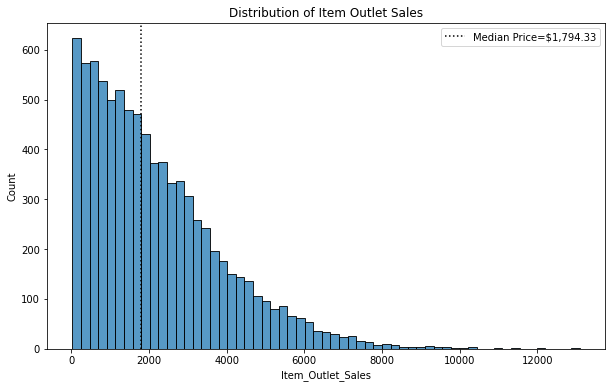

In [ ]:
plt.figure(figsize=(10,6))

ax = sns.histplot(data=df, x='Item_Outlet_Sales')

ax.set(title='Distribution of Item Outlet Sales');

median = df['Item_Outlet_Sales'].median()
ax.axvline(median,color='k', ls=':', 
           label=f"Median Price=${median:,.2f}");
ax.legend();

The figure above shows the distribution of the Item Outlet Sales of the different items sold. This that there are more items sold that have lower item outlet sales. The figure also shows the median of the item outlet sales which is $1,794.33 and is designated with the dashed line. 

In [ ]:
lowFat_filter = df['Item_Fat_Content'] == 'Low Fat'
regularFat_filter = df['Item_Fat_Content'] == 'Regular'
y = [len(df[lowFat_filter]), len(df[regularFat_filter])]
x = ["Low Fat", "Regular"]

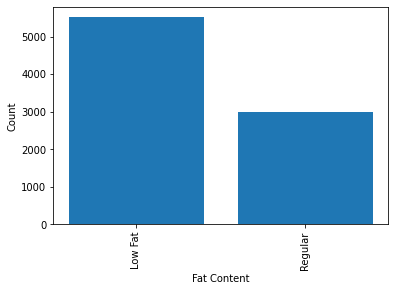

In [ ]:
plt.bar(x, y)
plt.ylabel('Count')
plt.xlabel('Fat Content')
plt.xticks(rotation=90);

The figure above shows that there are more unique Low Fat items that there are Regular items. 

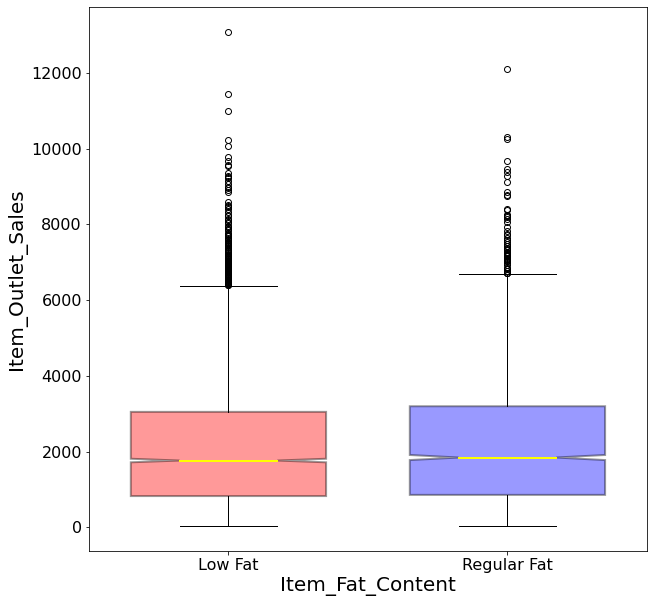

In [ ]:
lowFat = df.loc[df['Item_Fat_Content']=='Low Fat','Item_Outlet_Sales']
regularFat = df.loc[df['Item_Fat_Content']=='Regular','Item_Outlet_Sales']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,10))
boxplots = axes.boxplot([lowFat,regularFat],
           notch = True,
           labels=['Low Fat', 'Regular Fat'],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
          );
# The more you understand any library, the more you can do
boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('red')
plt.xlabel('Item_Fat_Content', fontsize = 20);
plt.ylabel('Item_Outlet_Sales', fontsize = 20);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);

The figure about shows that there are many outliers when it comes to Item_Outlet_Sales for both Low Fat items and Regular items. 

In [ ]:
corr = df.corr()

<AxesSubplot:>

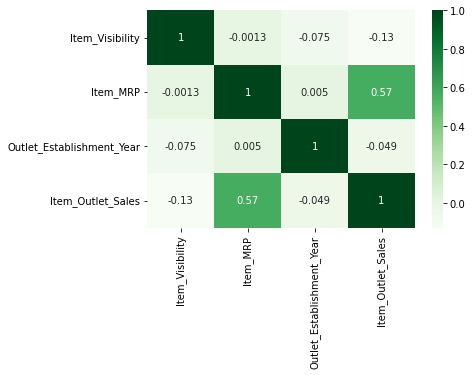

In [ ]:
sns.heatmap(corr, cmap = 'Greens', annot = True)

The figure above shows that the only sets of data that have any sort of correlation are Item_Visibility and Item_Outlet_Sales. The correlation is a negative correlation, so as Item_Visibility goes up, the Item_Outlet_Sales goes down, and vice versa.

## Explanatory Visuals

In [ ]:
import matplotlib as mpl

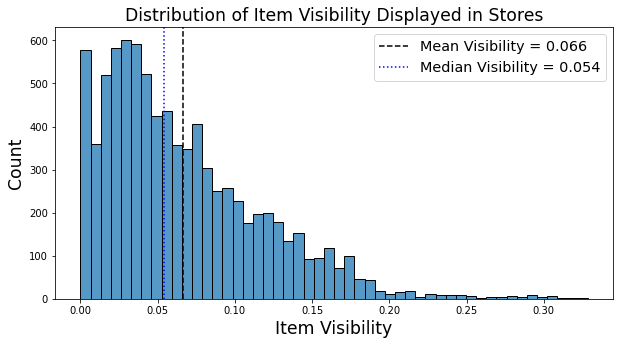

In [ ]:
fig, ax = plt.subplots(figsize = (10, 5))

sns.histplot(data = df, x = 'Item_Visibility', ax = ax)
ax.set_title('Distribution of Item Visibility Displayed in Stores', fontsize = 'xx-large');

mean_price = df['Item_Visibility'].mean()
ax.axvline(mean_price,color = 'k', ls = '--', 
           label = f"Mean Visibility = {round(mean_price, 3)}");

med_price = df['Item_Visibility'].median()
ax.axvline(med_price,color = 'b', ls = ':', 
           label = f"Median Visibility = {round(med_price, 3)}");

ax.set_xlabel(ax.xaxis.get_label().get_text().replace('_', ' '),
              fontsize = 'xx-large')
ax.set_ylabel(ax.yaxis.get_label().get_text(),
              fontsize = 'xx-large')

ax.legend(fontsize = 'x-large');

In the visual above, we see that the item visibility avearge is 0.066 and its median is 0.054. Most of the item visibility is low across the board.

Text(0.5, 1.0, 'Item MRP vs. Item Outlet Sales')

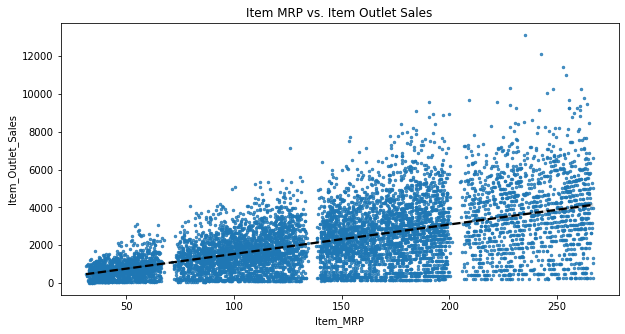

In [ ]:
fig, ax = plt.subplots(figsize = (10, 5))
sns.regplot(data=df, x='Item_MRP', y='Item_Outlet_Sales', 
            scatter_kws={'s':6},
            line_kws={'color': 'black', 'ls': '--'})

plt.title('Item MRP vs. Item Outlet Sales')

In the visual above, we see that Item MRP and Item Outlet sales have a moderate positive correlation. The correlation is that as the item MRP goes up, so does the item outlet sales. 